In [133]:
import pandas as pd

In [134]:
df = pd.read_csv('data/food52_scraped_data.csv')

In [135]:
df.head()

,_id,rating,recipe,title,weblink
0,59d7cf29a980892888190548,14,2 tablespoons unsalted butter\n1/4 cup diced y...,Austin Diner-Style Queso,https://food52.com/recipes/73529-austin-diner-...
1,59d7cf30a98089288819054a,29,1 pound shelled raw peanuts\n1 tablespoon plus...,Mamba (Spicy Haitian Peanut Butter),https://food52.com/recipes/73211-mamba-spicy-h...
2,59d7cf39a98089288819054c,2,2 cups (8 1/2 ounces) all-purpose flour\n1/2 c...,Sheet Pan Muffins,https://food52.com/recipes/73548-sheet-pan-muf...
3,59d7cf3fa98089288819054e,92,"1 1/2 cups (300g) Puy lentils, washed\n4 clove...",Anna Jones' Favorite Lentils with Roasted Toma...,https://food52.com/recipes/73511-anna-jones-fa...
4,59d7cf48a980892888190550,3,2 ounces Seedlip Garden 108\n0.75 ounces Lemon...,Seedlip's A Good Dill,https://food52.com/recipes/73252-seedlip-s-a-g...


In [267]:
len(df['rating'].where(df['rating'] == 0))

9721

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9721 entries, 0 to 9720
Data columns (total 5 columns):
_id        9721 non-null object
rating     9721 non-null int64
recipe     9233 non-null object
title      9721 non-null object
weblink    9721 non-null object
dtypes: int64(1), object(4)
memory usage: 379.8+ KB


In [137]:
import numpy as np
import string

In [138]:
def main_ingredient(col):
    ingredients = ['pork', 'chicken', 'beef']
    for item in ingredients:
        if item in str(col):
            return item
        else:
            continue

In [139]:
df['category'] = df['recipe'].apply(main_ingredient)

In [140]:
df['category'].value_counts()

chicken    2137
pork        696
beef        625
Name: category, dtype: int64

In [141]:
dummies = pd.get_dummies(df['category'])

In [142]:
dummies.head()

,beef,chicken,pork
0,0,0,0
1,0,0,0
2,0,0,0
3,1,0,0
4,0,0,0


In [203]:
df2 = pd.concat([df,dummies], axis=1)

In [204]:
df2.head()

,_id,rating,recipe,title,weblink,category,beef,chicken,pork
0,59d7cf29a980892888190548,14,2 tablespoons unsalted butter\n1/4 cup diced y...,Austin Diner-Style Queso,https://food52.com/recipes/73529-austin-diner-...,None,0,0,0
1,59d7cf30a98089288819054a,29,1 pound shelled raw peanuts\n1 tablespoon plus...,Mamba (Spicy Haitian Peanut Butter),https://food52.com/recipes/73211-mamba-spicy-h...,None,0,0,0
2,59d7cf39a98089288819054c,2,2 cups (8 1/2 ounces) all-purpose flour\n1/2 c...,Sheet Pan Muffins,https://food52.com/recipes/73548-sheet-pan-muf...,None,0,0,0
3,59d7cf3fa98089288819054e,92,"1 1/2 cups (300g) Puy lentils, washed\n4 clove...",Anna Jones' Favorite Lentils with Roasted Toma...,https://food52.com/recipes/73511-anna-jones-fa...,beef,1,0,0
4,59d7cf48a980892888190550,3,2 ounces Seedlip Garden 108\n0.75 ounces Lemon...,Seedlip's A Good Dill,https://food52.com/recipes/73252-seedlip-s-a-g...,None,0,0,0


In [205]:
del df2['_id']

In [206]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9721 entries, 0 to 9720
Data columns (total 8 columns):
rating      9721 non-null int64
recipe      9233 non-null object
title       9721 non-null object
weblink     9721 non-null object
category    3458 non-null object
beef        9721 non-null uint8
chicken     9721 non-null uint8
pork        9721 non-null uint8
dtypes: int64(1), object(4), uint8(3)
memory usage: 408.3+ KB


In [207]:
df2.dropna(axis=0, subset=['recipe'], inplace=True)

In [208]:
df2['vegetarian'] = df2['category'].isnull()

In [170]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [171]:
from sklearn.decomposition import NMF

## topic extraction from recipe title

In [209]:
X = df2['title'].values

In [210]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [211]:
tfidf = tfidf_vectorizer.fit_transform(X)

In [212]:
nmf = NMF(n_components=8, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)

In [213]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [214]:
print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words=6)


Topics in NMF model (Frobenius norm):
Topic #0: chicken roast lemon fried rice curry
Topic #1: soup noodle lentil mushroom bean sausage
Topic #2: salad potato dressing summer grilled vinaigrette
Topic #3: pork tenderloin chops pulled roast braised
Topic #4: beef stew spicy braised corned short
Topic #5: cake chocolate cream cookies butter ice
Topic #6: roasted potatoes lemon garlic cauliflower squash
Topic #7: sauce tomato grilled pasta meatballs cheese



In [215]:
nmf_w = nmf.fit_transform(tfidf)
nmf_h = nmf.components_

In [216]:
df2['topic_labels'] = nmf_w.argmax(axis=1) # this was the right code to get labels/clusters

In [217]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 0 to 9714
Data columns (total 10 columns):
rating          9233 non-null int64
recipe          9233 non-null object
title           9233 non-null object
weblink         9233 non-null object
category        3458 non-null object
beef            9233 non-null uint8
chicken         9233 non-null uint8
pork            9233 non-null uint8
vegetarian      9233 non-null bool
topic_labels    9233 non-null int64
dtypes: bool(1), int64(2), object(4), uint8(3)
memory usage: 541.0+ KB


In [219]:
topics = {0:'chicken_nmf', 1:'soup_nmf', 2:'salad_nmf', 3:'pork_nmf', 4:'beef_nmf', 5:'chocolate_cake_nmf', 6:'potatoes_nmf', 7:'pasta_nmf'}

In [220]:
def title_topics(col):
    return topics[col]

In [221]:
df2['topic_word'] = df2['topic_labels'].apply(title_topics)

In [222]:
dum = pd.get_dummies(df2['topic_word'])

In [224]:
del dum['pasta_nmf']

In [225]:
df2 = pd.concat([df2, dum], axis=1)

In [226]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 0 to 9714
Data columns (total 18 columns):
rating                9233 non-null int64
recipe                9233 non-null object
title                 9233 non-null object
weblink               9233 non-null object
category              3458 non-null object
beef                  9233 non-null uint8
chicken               9233 non-null uint8
pork                  9233 non-null uint8
vegetarian            9233 non-null bool
topic_labels          9233 non-null int64
topic_word            9233 non-null object
beef_nmf              9233 non-null uint8
chicken_nmf           9233 non-null uint8
chocolate_cake_nmf    9233 non-null uint8
pork_nmf              9233 non-null uint8
potatoes_nmf          9233 non-null uint8
salad_nmf             9233 non-null uint8
soup_nmf              9233 non-null uint8
dtypes: bool(1), int64(2), object(5), uint8(10)
memory usage: 676.2+ KB


In [377]:
def label(col):
    if col <= 2:
        return True
    if col != 0:
        return False
    
df2['label'] = df2['rating'].apply(label)

In [378]:
df2['label'].value_counts()

False    7583
True     1650
Name: label, dtype: int64

In [379]:
7583/(7583+1650)

0.8212931874796924

In [380]:
working = df2[['label','rating', 'beef', 'chicken', 'pork', 'vegetarian','beef_nmf', 'chicken_nmf', 'chocolate_cake_nmf', 'pork_nmf', 'potatoes_nmf', 'salad_nmf', 'soup_nmf']]

In [381]:
working.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 0 to 9714
Data columns (total 13 columns):
label                 9233 non-null bool
rating                9233 non-null int64
beef                  9233 non-null uint8
chicken               9233 non-null uint8
pork                  9233 non-null uint8
vegetarian            9233 non-null bool
beef_nmf              9233 non-null uint8
chicken_nmf           9233 non-null uint8
chocolate_cake_nmf    9233 non-null uint8
pork_nmf              9233 non-null uint8
potatoes_nmf          9233 non-null uint8
salad_nmf             9233 non-null uint8
soup_nmf              9233 non-null uint8
dtypes: bool(2), int64(1), uint8(10)
memory usage: 572.5 KB


In [229]:
# import numpy as np
# def log_transform(col):
#     return np.log(col + 0.1)
# working['log_rating'] = working['rating'].apply(log_transform)

/Applications/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [382]:
y = working.pop('label')
del working['rating']
# y = working.pop('log_rating')

In [383]:
working.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 0 to 9714
Data columns (total 11 columns):
beef                  9233 non-null uint8
chicken               9233 non-null uint8
pork                  9233 non-null uint8
vegetarian            9233 non-null bool
beef_nmf              9233 non-null uint8
chicken_nmf           9233 non-null uint8
chocolate_cake_nmf    9233 non-null uint8
pork_nmf              9233 non-null uint8
potatoes_nmf          9233 non-null uint8
salad_nmf             9233 non-null uint8
soup_nmf              9233 non-null uint8
dtypes: bool(1), uint8(10)
memory usage: 491.3 KB


In [384]:
X = working.values

In [385]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [386]:
from sklearn.ensemble import GradientBoostingClassifier

In [387]:
gbc = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_features="auto")

In [388]:
mod4 = gbc.fit(X_train, y_train)

In [389]:
mod4.score(X_test, y_test)

0.81982277650147684

In [390]:
mod4.feature_importances_

array([ 0.04126758,  0.14542956,  0.10431519,  0.21263745,  0.08455625,
        0.13827669,  0.03254077,  0.08930245,  0.0498816 ,  0.09016165,
        0.01163081])

In [391]:
y_pred = mod4.predict_proba(X_test)

In [392]:
from sklearn.metrics import precision_recall_curve

In [393]:
precision, recall, thresholds = precision_recall_curve(y_test, mod4.decision_function(X_test))

In [394]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, mod4.decision_function(X_test))

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))


Average precision-recall score: 0.28


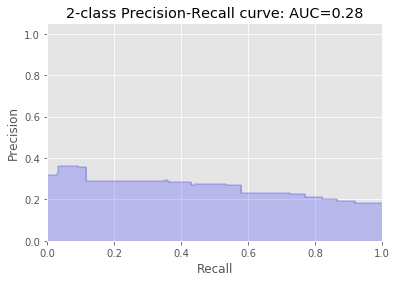

In [395]:
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(
          average_precision))

In [396]:
from sklearn.metrics import roc_curve, auc

In [398]:
y_score = mod4.decision_function(X_test)
n_classes = 2
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)


ValueError: Can only tuple-index with a MultiIndex

In [350]:
y.shape

(9233,)

## Linear modeling of data

In [233]:
from sklearn.linear_model import LinearRegression

In [234]:
from sklearn.model_selection import train_test_split

In [252]:
model = LinearRegression()

In [253]:
mod = model.fit(X_train, y_train)

In [254]:
mod.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [255]:
mod.score(X_test, y_test)

0.014135345392929488

In [256]:
from sklearn.ensemble import GradientBoostingRegressor

In [257]:
gbr = GradientBoostingRegressor()

In [258]:
mod2 = gbr.fit(X_train, y_train)

In [259]:
mod2.score(X_test, y_test)

0.015741363429207622

In [260]:
mod2.feature_importances_

array([ 0.06596924,  0.13100088,  0.10658141,  0.19258925,  0.0742221 ,
        0.10287001,  0.04971779,  0.0923014 ,  0.03764683,  0.06365376,
        0.08344732])

In [345]:
mod2.loss_

# Distribution of # likes

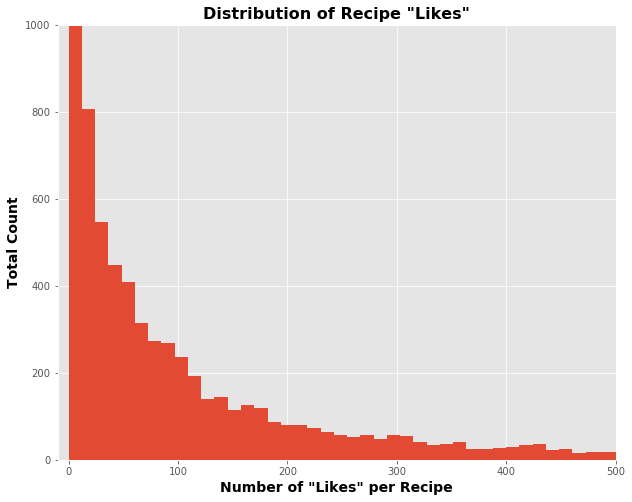

In [150]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(df2['rating'], bins=1000)
ax.set_ylim([0, 1000])
ax.set_xlim([-10, 500])
ax.set_title('Distribution of Recipe "Likes"', fontsize=16, weight='bold', color='k')
ax.set_xlabel('Number of "Likes" per Recipe', fontsize=14, weight='bold', color='k')
ax.set_ylabel('Total Count', fontsize=14, weight='bold', color='k')
# plt.savefig('data/distribution.png')

In [151]:
beef = df2['rating'].where(df2['category'] == 'beef')

In [152]:
beef.dropna(inplace=True)

In [153]:
beef_df = pd.DataFrame(beef)
beef_df.reset_index(inplace=True)

In [154]:
chicken = df2['rating'].where(df2['category'] == 'chicken')

In [155]:
chicken.dropna(inplace=True)

In [156]:
pork = df2['rating'].where(df2['category'] == 'pork')

In [157]:
pork.dropna(inplace=True)

In [158]:
other = df2['rating'].where(df2['category'].isnull())

In [159]:
other.dropna(inplace=True)

In [160]:
chicken_df = pd.DataFrame(chicken)
chicken_df.reset_index(inplace=True)
pork_df = pd.DataFrame(pork)
pork_df.reset_index(inplace=True)
other_df = pd.DataFrame(other)
other_df.reset_index(inplace=True)

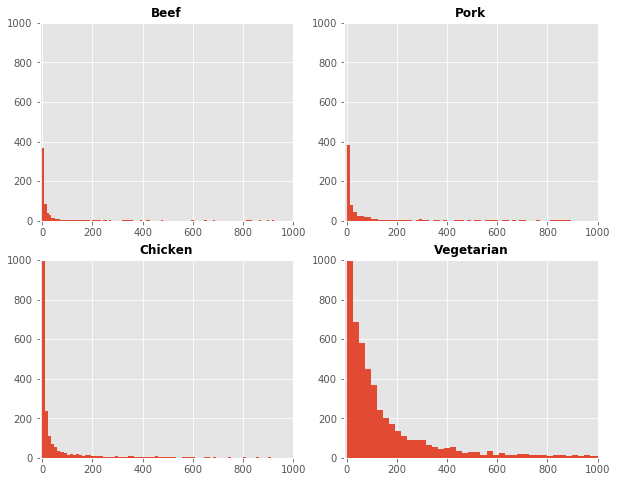

In [161]:
fig, axs = plt.subplots(2,2, figsize=(10,8))
recipes = [beef_df, chicken_df, pork_df, other_df]
titles = ['Beef', 'Chicken', 'Pork', 'Vegetarian']
for idx, ax in enumerate(axs):
    ax[0].hist(recipes[idx]['rating'], bins=500)
    ax[1].hist(recipes[idx + 2]['rating'], bins=500)
    ax[0].set_ylim([0, 1000])
    ax[1].set_ylim([0, 1000])
    ax[0].set_xlim([-10, 1000])
    ax[1].set_xlim([-10, 1000])
    ax[0].set_title(titles[idx], fontsize=12, weight='bold', color='k')
    ax[1].set_title(titles[idx+2], fontsize=12, weight='bold', color='k')
#     ax[idx].set_xlabel('Number of "Likes" per Recipe', fontsize=14, weight='bold', color='k')
#     ax[idx].set_ylabel('Total Count', fontsize=14, weight='bold', color='k')
#     plt.tight_layout()
#     plt.savefig('data/distribution_ingredients.png')